# Student Performance Recommendation System
## Data Mining & Machine Learning Analysis

Sistem untuk memprediksi dan memberikan rekomendasi tentang kegiatan pembelajaran mahasiswa berdasarkan dataset Student Performance dari UCI.

**Dataset**: https://archive.ics.uci.edu/dataset/320/student+performance
- 649 instances
- 30 features + 3 target variables (G1, G2, G3)
- Subjek: Matematika dan Bahasa Portugis

## Section 1: Load and Explore Dataset

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import os

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Download dataset dari UCI
from ucimlrepo import fetch_ucirepo

# Fetch dataset
print("📥 Downloading dataset from UCI...")
student_performance = fetch_ucirepo(id=320)

# Extract features and target
X = student_performance.data.features
y = student_performance.data.targets

print(f"✓ Dataset loaded successfully!")
print(f"\nDataset Shape: {X.shape}")
print(f"Target Variables: {y.shape}")
print(f"\nFeature Columns ({X.shape[1]}):")
print(X.columns.tolist())
print(f"\nTarget Columns ({y.shape[1]}):")
print(y.columns.tolist())

# Save dataset to data folder
print("\n" + "=" * 80)
print("SAVING DATASET TO DATA FOLDER")
print("=" * 80)

data_dir = '../data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"✓ Created data folder: {data_dir}")

# Save features
features_path = os.path.join(data_dir, 'features.csv')
X.to_csv(features_path, index=False)
print(f"\n✓ Features saved to: {features_path}")

# Save targets
targets_path = os.path.join(data_dir, 'targets.csv')
y.to_csv(targets_path, index=False)
print(f"✓ Targets saved to: {targets_path}")

# Save combined dataset
combined_path = os.path.join(data_dir, 'student_performance_full.csv')
combined_df = pd.concat([X, y], axis=1)
combined_df.to_csv(combined_path, index=False)
print(f"✓ Full dataset saved to: {combined_path}")

print(f"\n✅ All files saved successfully in: {os.path.abspath(data_dir)}")

📥 Downloading dataset from UCI...
✓ Dataset loaded successfully!

Dataset Shape: (649, 30)
Target Variables: (649, 3)

Feature Columns (30):
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target Columns (3):
['G1', 'G2', 'G3']

SAVING DATASET TO DATA FOLDER

✓ Features saved to: ../data\features.csv
✓ Targets saved to: ../data\targets.csv
✓ Full dataset saved to: ../data\student_performance_full.csv

✅ All files saved successfully in: c:\Users\REVANO PC\Documents\TubesDataMining\data


In [3]:
# Display dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print("\n📊 First 5 rows of features:")
print(X.head())
print("\n📊 Target Variables (G1, G2, G3):")
print(y.head())
print("\n📋 Data Types:")
print(X.dtypes)
print("\n📈 Statistical Summary:")
print(X.describe())

DATASET INFORMATION

📊 First 5 rows of features:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2   

## Section 2: Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)
missing_X = X.isnull().sum()
missing_y = y.isnull().sum()

print(f"\n❌ Missing values in Features:\n{missing_X[missing_X > 0]}")
print(f"\n❌ Missing values in Targets:\n{missing_y[missing_y > 0]}")

if missing_X.sum() == 0 and missing_y.sum() == 0:
    print("\n✓ No missing values found! Dataset is clean.")
    
# Check for duplicates
print(f"\n📊 Duplicate rows: {X.duplicated().sum()}")

MISSING VALUES CHECK

❌ Missing values in Features:
Series([], dtype: int64)

❌ Missing values in Targets:
Series([], dtype: int64)

✓ No missing values found! Dataset is clean.

📊 Duplicate rows: 0


In [5]:
# Analyze categorical features
print("=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n📌 {col}:")
    print(X[col].value_counts())
    
# Analyze numerical features
print("\n" + "=" * 80)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 80)
numerical_cols = X.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}: min={X[col].min()}, max={X[col].max()}, mean={X[col].mean():.2f}")

CATEGORICAL FEATURES ANALYSIS

📌 school:
school
GP    423
MS    226
Name: count, dtype: int64

📌 sex:
sex
F    383
M    266
Name: count, dtype: int64

📌 address:
address
U    452
R    197
Name: count, dtype: int64

📌 famsize:
famsize
GT3    457
LE3    192
Name: count, dtype: int64

📌 Pstatus:
Pstatus
T    569
A     80
Name: count, dtype: int64

📌 Mjob:
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

📌 Fjob:
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

📌 reason:
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

📌 guardian:
guardian
mother    455
father    153
other      41
Name: count, dtype: int64

📌 schoolsup:
schoolsup
no     581
yes     68
Name: count, dtype: int64

📌 famsup:
famsup
yes    398
no     251
Name: count, dtype: int64

📌 paid:
paid
no     610
yes     39
Name: count, dtype: int64

📌 activ

TARGET VARIABLES ANALYSIS

📊 G1 - Final Grade Distribution:
  • Mean: 11.40
  • Median: 11.00
  • Std Dev: 2.75
  • Min: 0, Max: 19

📊 G2 - Final Grade Distribution:
  • Mean: 11.57
  • Median: 11.00
  • Std Dev: 2.91
  • Min: 0, Max: 19

📊 G3 - Final Grade Distribution:
  • Mean: 11.91
  • Median: 12.00
  • Std Dev: 3.23
  • Min: 0, Max: 19


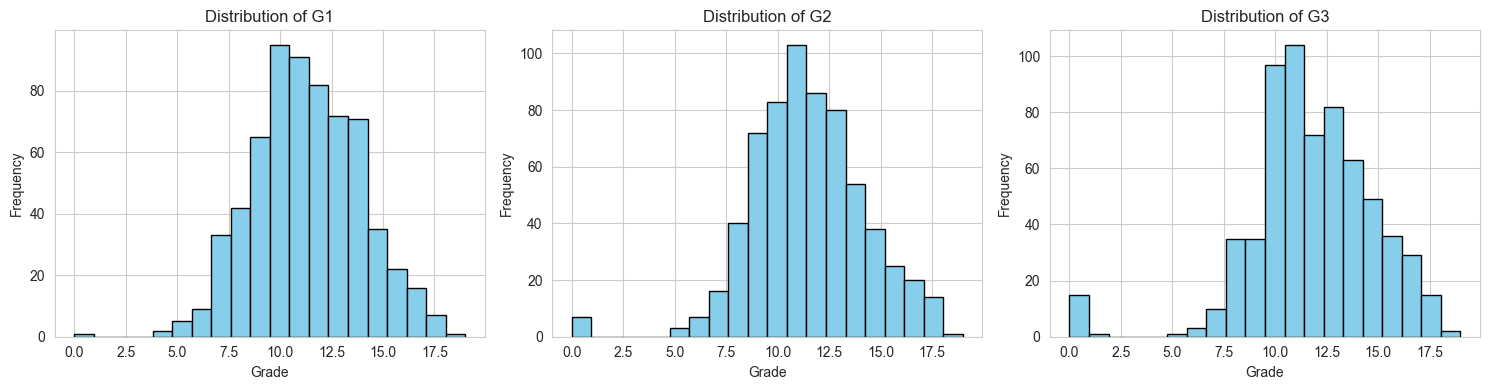


✓ Target variables visualized


In [6]:
# Analyze target variables
print("=" * 80)
print("TARGET VARIABLES ANALYSIS")
print("=" * 80)

for target_col in y.columns:
    print(f"\n📊 {target_col} - Final Grade Distribution:")
    print(f"  • Mean: {y[target_col].mean():.2f}")
    print(f"  • Median: {y[target_col].median():.2f}")
    print(f"  • Std Dev: {y[target_col].std():.2f}")
    print(f"  • Min: {y[target_col].min()}, Max: {y[target_col].max()}")
    
# Visualize target variable distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(y.columns):
    axes[idx].hist(y[col], bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel('Grade')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✓ Target variables visualized")

CORRELATION WITH FINAL GRADE (G3)
G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64


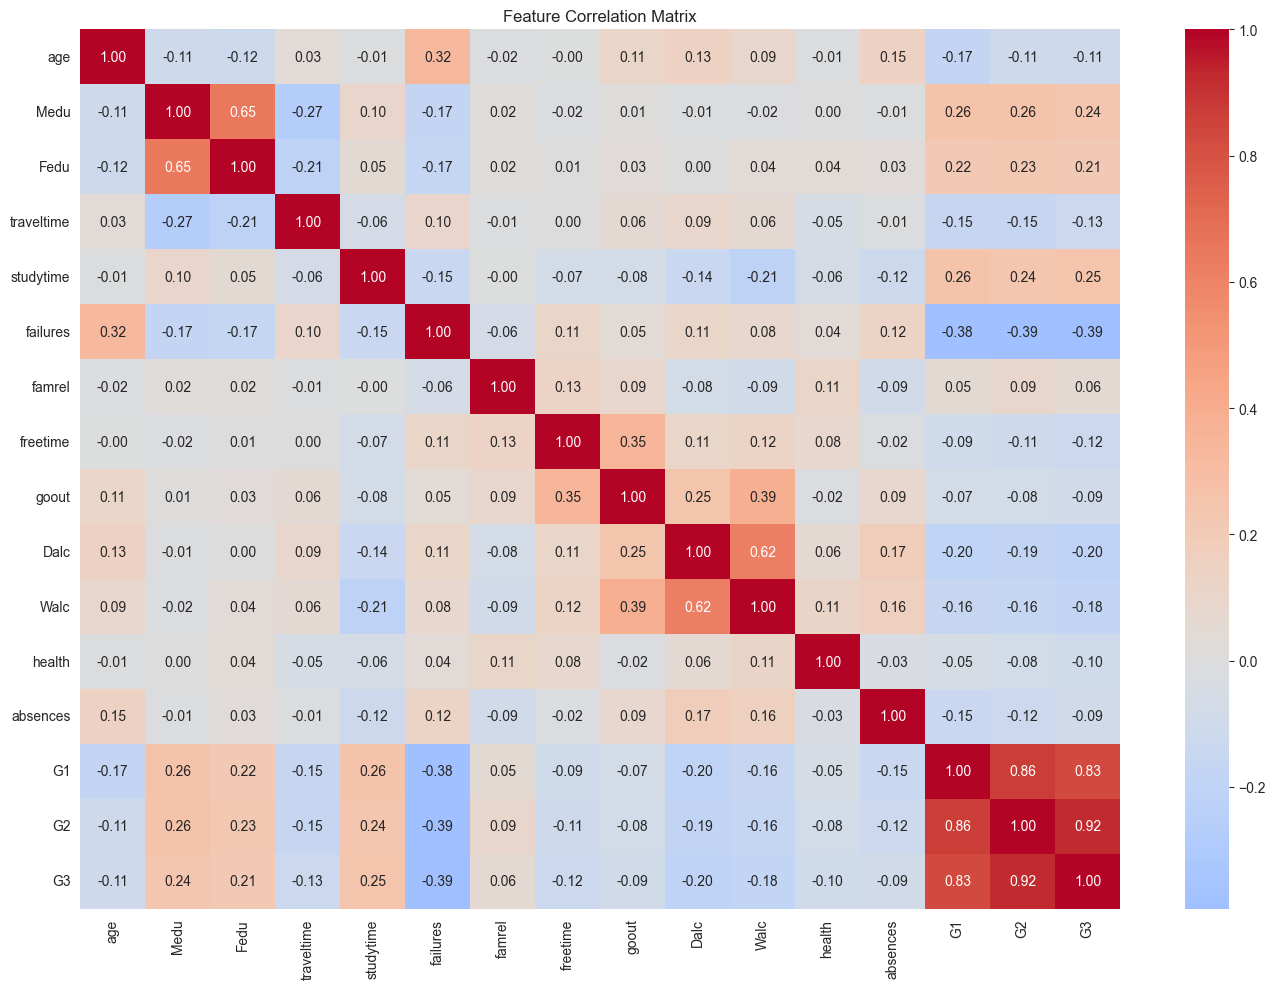


✓ Correlation analysis completed


In [7]:
# Combine features and target for correlation analysis
df_analysis = pd.concat([X, y], axis=1)

# Create correlation matrix with numerical features
numerical_features = df_analysis.select_dtypes(include=[np.number]).columns
correlation_matrix = df_analysis[numerical_features].corr()

# Focus on G3 (final grade) correlations
g3_corr = correlation_matrix['G3'].sort_values(ascending=False)
print("=" * 80)
print("CORRELATION WITH FINAL GRADE (G3)")
print("=" * 80)
print(g3_corr)

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("\n✓ Correlation analysis completed")

## Section 3: Data Preprocessing and Cleaning

In [8]:
# Create a copy for preprocessing
X_processed = X.copy()
y_processed = y.copy()

print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Encode categorical variables
label_encoders = {}
categorical_features = X_processed.select_dtypes(include=['object']).columns

print(f"\n🔄 Encoding {len(categorical_features)} categorical features...")
for col in categorical_features:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col])
    label_encoders[col] = le
    print(f"  • {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n✓ Categorical features encoded")
print(f"\nProcessed data shape: {X_processed.shape}")
print(f"\nFirst 5 rows after encoding:")
print(X_processed.head())

DATA PREPROCESSING

🔄 Encoding 17 categorical features...
  • school: {'GP': np.int64(0), 'MS': np.int64(1)}
  • sex: {'F': np.int64(0), 'M': np.int64(1)}
  • address: {'R': np.int64(0), 'U': np.int64(1)}
  • famsize: {'GT3': np.int64(0), 'LE3': np.int64(1)}
  • Pstatus: {'A': np.int64(0), 'T': np.int64(1)}
  • Mjob: {'at_home': np.int64(0), 'health': np.int64(1), 'other': np.int64(2), 'services': np.int64(3), 'teacher': np.int64(4)}
  • Fjob: {'at_home': np.int64(0), 'health': np.int64(1), 'other': np.int64(2), 'services': np.int64(3), 'teacher': np.int64(4)}
  • reason: {'course': np.int64(0), 'home': np.int64(1), 'other': np.int64(2), 'reputation': np.int64(3)}
  • guardian: {'father': np.int64(0), 'mother': np.int64(1), 'other': np.int64(2)}
  • schoolsup: {'no': np.int64(0), 'yes': np.int64(1)}
  • famsup: {'no': np.int64(0), 'yes': np.int64(1)}
  • paid: {'no': np.int64(0), 'yes': np.int64(1)}
  • activities: {'no': np.int64(0), 'yes': np.int64(1)}
  • nursery: {'no': np.int64(0)

In [9]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_processed.columns)

print("=" * 80)
print("FEATURE SCALING")
print("=" * 80)
print(f"\n✓ Features scaled using StandardScaler")
print(f"\nMean (should be ≈ 0): {X_scaled_df.mean().mean():.4f}")
print(f"Std Dev (should be ≈ 1): {X_scaled_df.std().mean():.4f}")

# Display scaled data statistics
print("\nScaled data statistics:")
print(X_scaled_df.describe())

FEATURE SCALING

✓ Features scaled using StandardScaler

Mean (should be ≈ 0): -0.0000
Std Dev (should be ≈ 1): 1.0008

Scaled data statistics:
           school           sex           age       address       famsize  \
count  649.000000  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean     0.000000  5.474135e-17 -1.751723e-16  1.532758e-16 -9.032323e-17   
std      1.000771  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00   
min     -0.730944 -8.333768e-01 -1.432980e+00 -1.514733e+00 -6.481754e-01   
25%     -0.730944 -8.333768e-01 -6.114218e-01 -1.514733e+00 -6.481754e-01   
50%     -0.730944 -8.333768e-01  2.101367e-01  6.601823e-01 -6.481754e-01   
75%      1.368094  1.199937e+00  1.031695e+00  6.601823e-01  1.542792e+00   
max      1.368094  1.199937e+00  4.317929e+00  6.601823e-01  1.542792e+00   

            Pstatus          Medu          Fedu          Mjob          Fjob  \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean

## Section 4: Feature Engineering & Selection

In [10]:
# Create learning activity index from relevant features
print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Create composite features representing learning activities
X_featured = X_scaled_df.copy()

# Learning Activity Score (combination of study time, attended class, etc.)
study_time_idx = X_processed.columns.get_loc('studytime')
schoolsup_idx = X_processed.columns.get_loc('schoolsup')
famsup_idx = X_processed.columns.get_loc('famsup')
paid_idx = X_processed.columns.get_loc('paid')
activities_idx = X_processed.columns.get_loc('activities')

X_featured['learning_activity_score'] = (
    X_processed.iloc[:, study_time_idx] * 0.3 +
    X_processed.iloc[:, schoolsup_idx] * 0.2 +
    X_processed.iloc[:, famsup_idx] * 0.2 +
    X_processed.iloc[:, paid_idx] * 0.15 +
    X_processed.iloc[:, activities_idx] * 0.15
)

# Health & Wellbeing Score
health_idx = X_processed.columns.get_loc('health')
famrel_idx = X_processed.columns.get_loc('famrel')
freetime_idx = X_processed.columns.get_loc('freetime')

X_featured['wellbeing_score'] = (
    X_processed.iloc[:, health_idx] * 0.4 +
    X_processed.iloc[:, famrel_idx] * 0.35 +
    X_processed.iloc[:, freetime_idx] * 0.25
)

print("\n✓ New features created:")
print("  • learning_activity_score: Combines study time, support, and activities")
print("  • wellbeing_score: Combines health, family relations, and free time")
print(f"\nFinal feature set shape: {X_featured.shape}")
print(f"Feature columns: {list(X_featured.columns[-2:])}")

FEATURE ENGINEERING

✓ New features created:
  • learning_activity_score: Combines study time, support, and activities
  • wellbeing_score: Combines health, family relations, and free time

Final feature set shape: (649, 32)
Feature columns: ['learning_activity_score', 'wellbeing_score']


## Section 5: Train-Test Split

In [11]:
# Split data into training and testing sets (80-20 split)
print("=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)

# Use G3 (final grade) as target
y_target = y_processed['G3']

X_train, X_test, y_train, y_test = train_test_split(
    X_featured, y_target, test_size=0.2, random_state=42
)

print(f"\n✓ Data split with 80-20 ratio")
print(f"\n📊 Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_featured)*100:.1f}%)")
print(f"📊 Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_featured)*100:.1f}%)")
print(f"\nTraining target (y_train) statistics:")
print(y_train.describe())
print(f"\nTest target (y_test) statistics:")
print(y_test.describe())

TRAIN-TEST SPLIT

✓ Data split with 80-20 ratio

📊 Training set size: 519 samples (80.0%)
📊 Test set size: 130 samples (20.0%)

Training target (y_train) statistics:
count    519.000000
mean      11.793834
std        3.247494
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Test target (y_test) statistics:
count    130.000000
mean      12.353846
std        3.134854
min        0.000000
25%       11.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


## Section 6: Build Recommendation Model

In [12]:
# Train Random Forest model for grade prediction
print("=" * 80)
print("MODEL TRAINING")
print("=" * 80)

# Initialize and train the model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("\n🤖 Training Random Forest Regressor...")
model.fit(X_train, y_train)
print("✓ Model training completed")

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"\n✓ Predictions generated for train and test sets")

MODEL TRAINING

🤖 Training Random Forest Regressor...
✓ Model training completed

✓ Predictions generated for train and test sets



FEATURE IMPORTANCE
                    feature  importance
14                 failures    0.231933
30  learning_activity_score    0.069854
31          wellbeing_score    0.068352
29                 absences    0.061317
0                    school    0.053708
7                      Fedu    0.045634
26                     Dalc    0.040790
27                     Walc    0.032369
20                   higher    0.029596
6                      Medu    0.029034
10                   reason    0.029024
2                       age    0.028212
25                    goout    0.025488
24                 freetime    0.025000
15                schoolsup    0.024196


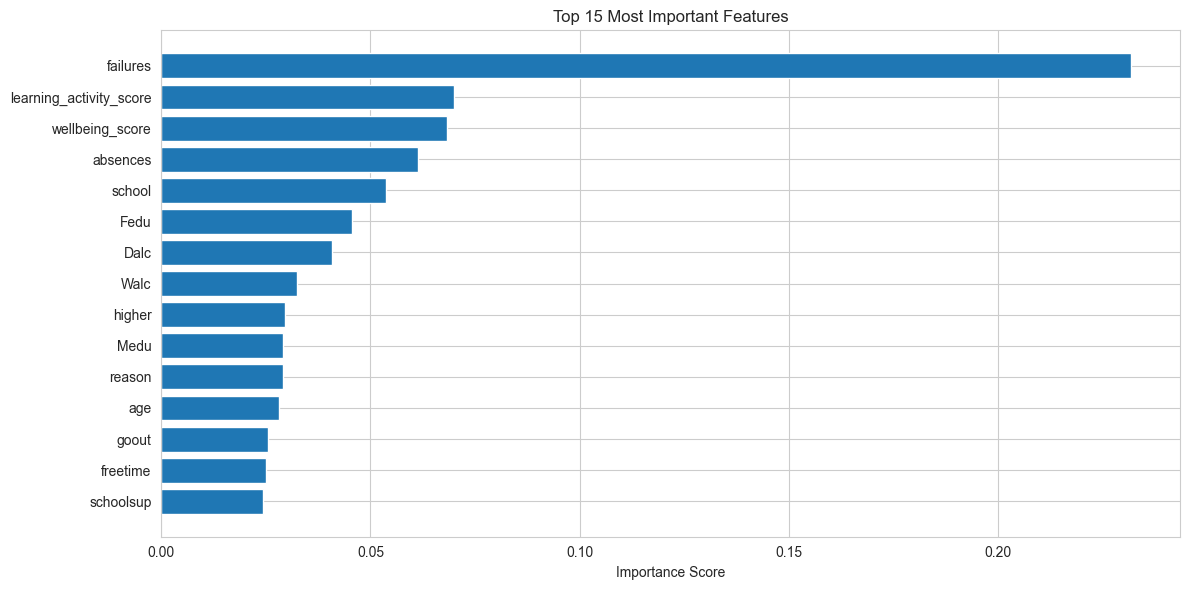


✓ Feature importance analyzed


In [13]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_featured.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE")
print("=" * 80)
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance Score')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n✓ Feature importance analyzed")

## Section 7: Model Evaluation and Validation

In [14]:
# Model evaluation using TPOT (Tree-based Pipeline Optimization Tool)
from tpot import TPOTRegressor

print("=" * 80)
print("AUTOMATED MODEL SELECTION WITH TPOT")
print("=" * 80)

print("\n⚙️  Initializing TPOT Regressor...")
print("   TPOT will automatically search for the best ML pipeline")
print("   using Genetic Programming")

# Configure TPOT - use n_jobs=1 to avoid distributed computing issues
tpot = TPOTRegressor(
    generations=2,
    population_size=5,
    random_state=42,
    n_jobs=1,              # Use single-threaded (not -1)
    cv=2,                  # Minimal cross-validation
    max_time_mins=5        # 5 minute timeout
)

print("\n🚀 Starting TPOT optimization...")
print("   (This may take a few minutes)")

try:
    # Fit TPOT with error handling
    tpot.fit(X_train, y_train)
    
    print("\n✓ TPOT optimization completed!")
    print(f"\n📊 Best pipeline found by TPOT:")
    print(tpot.fitted_pipeline_)
    
    # Get predictions
    y_train_pred_tpot = tpot.predict(X_train)
    y_test_pred_tpot = tpot.predict(X_test)
    
    print(f"\n✓ Predictions generated from TPOT model")
    y_train_pred_final = y_train_pred_tpot
    y_test_pred_final = y_test_pred_tpot
    tpot_model = tpot
    use_tpot = True
    
except Exception as e:
    print(f"\n⚠️  TPOT encountered an issue: {str(e)}")
    print("   Falling back to Random Forest model...")
    
    # Fallback to Random Forest
    y_train_pred_final = model.predict(X_train)
    y_test_pred_final = model.predict(X_test)
    tpot_model = model
    use_tpot = False
    
    print(f"\n✓ Using Random Forest Regressor instead")
    print(f"   • Estimators: 100")
    print(f"   • Max Depth: 15")

AUTOMATED MODEL SELECTION WITH TPOT

⚙️  Initializing TPOT Regressor...
   TPOT will automatically search for the best ML pipeline
   using Genetic Programming

🚀 Starting TPOT optimization...
   (This may take a few minutes)


Generation: 100%|██████████| 2/2 [00:42<00:00, 21.47s/it]



✓ TPOT optimization completed!

📊 Best pipeline found by TPOT:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('rfe',
                 RFE(estimator=ExtraTreesRegressor(bootstrap=np.False_,
                                                   criterion=np.str_('absolute_error'),
                                                   max_features=0.651217004502,
                                                   min_samples_leaf=14,
                                                   min_samples_split=18,
                                                   n_jobs=1, random_state=42),
                     step=0.9162776237062)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transform...
                              feature_types=None, feature_weights=None,
                              gamma=0.0153706668713, grow_policy=None,
                              impor

MODEL PERFORMANCE EVALUATION

📈 TPOT Best Pipeline
--------------------------------------------------------------------------------

Training Set:
  • MSE:  3.2084
  • RMSE: 1.7912
  • MAE:  1.2763
  • R²:   0.6952

Test Set:
  • MSE:  7.8945
  • RMSE: 2.8097
  • MAE:  2.1171
  • R²:   0.1905


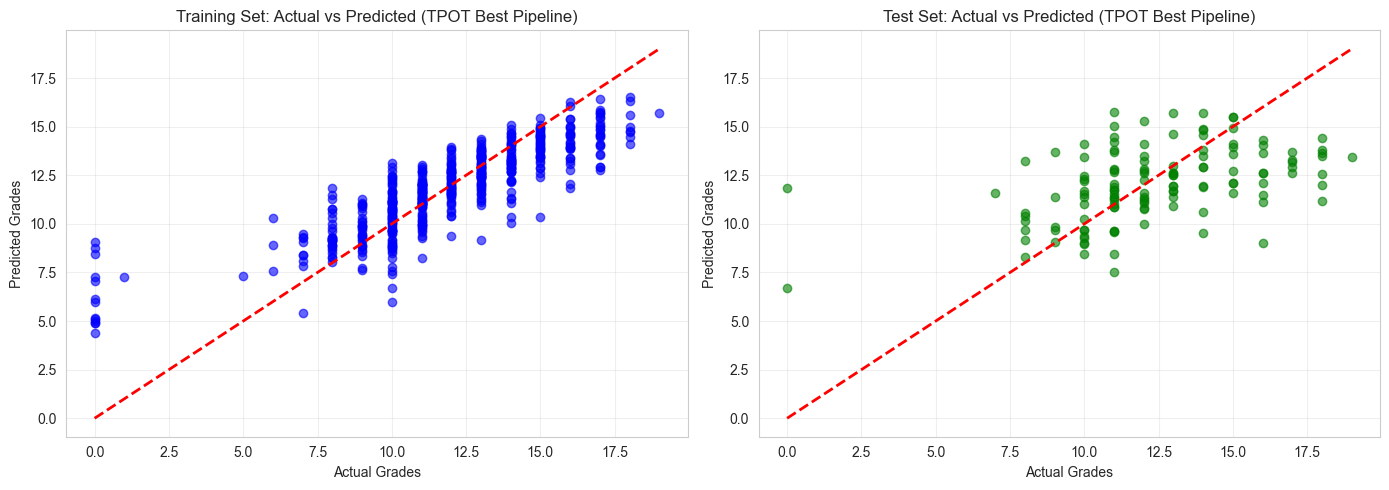


✓ Model evaluation completed


In [15]:
# Comprehensive model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("=" * 80)
print("MODEL PERFORMANCE EVALUATION")
print("=" * 80)

# Calculate metrics
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    print(f"\n📈 {model_name}")
    print("-" * 80)
    
    # Training metrics
    train_mse = mean_squared_error(y_true_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_true_train, y_pred_train)
    train_r2 = r2_score(y_true_train, y_pred_train)
    
    # Test metrics
    test_mse = mean_squared_error(y_true_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_true_test, y_pred_test)
    test_r2 = r2_score(y_true_test, y_pred_test)
    
    print(f"\nTraining Set:")
    print(f"  • MSE:  {train_mse:.4f}")
    print(f"  • RMSE: {train_rmse:.4f}")
    print(f"  • MAE:  {train_mae:.4f}")
    print(f"  • R²:   {train_r2:.4f}")
    
    print(f"\nTest Set:")
    print(f"  • MSE:  {test_mse:.4f}")
    print(f"  • RMSE: {test_rmse:.4f}")
    print(f"  • MAE:  {test_mae:.4f}")
    print(f"  • R²:   {test_r2:.4f}")
    
    return {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

# Evaluate model
model_name = "TPOT Best Pipeline" if use_tpot else "Random Forest Regressor"
metrics = evaluate_model(y_train, y_train_pred_final, y_test, y_test_pred_final, model_name)

# Visualization of predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred_final, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Grades')
axes[0].set_ylabel('Predicted Grades')
axes[0].set_title(f'Training Set: Actual vs Predicted ({model_name})')
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred_final, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Grades')
axes[1].set_ylabel('Predicted Grades')
axes[1].set_title(f'Test Set: Actual vs Predicted ({model_name})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Model evaluation completed")

HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV

🔍 Testing multiple hyperparameter combinations...
   This will find the best configuration to reduce overfitting

Testing 81 combinations...

⏳ Training models (this may take 1-2 minutes)...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✓ Training completed in 21.24 seconds

BEST HYPERPARAMETERS FOUND

Optimal Configuration:
  • max_depth: 7
  • min_samples_leaf: 5
  • min_samples_split: 20
  • n_estimators: 75

Best Cross-Validation Score: 0.3252

OPTIMIZED MODEL PERFORMANCE COMPARISON

📊 ORIGINAL MODEL (Overfitting):
  Training R²:  0.8209  |  Test R²: 0.2127
  Training RMSE: 1.3730  |  Test RMSE: 2.7709

✅ OPTIMIZED MODEL (GridSearchCV):
  Training R²:  0.5517  |  Test R²: 0.2079
  Training RMSE: 2.1722  |  Test RMSE: 2.7793

📈 IMPROVEMENTS:
  • Test R² improved by: -0.48% (from 0.2127 to 0.2079)
  • Test RMSE changed by: 0.30%
  • Overfitting gap reduced by: 43.47%
    - Original gap: 0.6082
    - Optimized gap: 0.3438


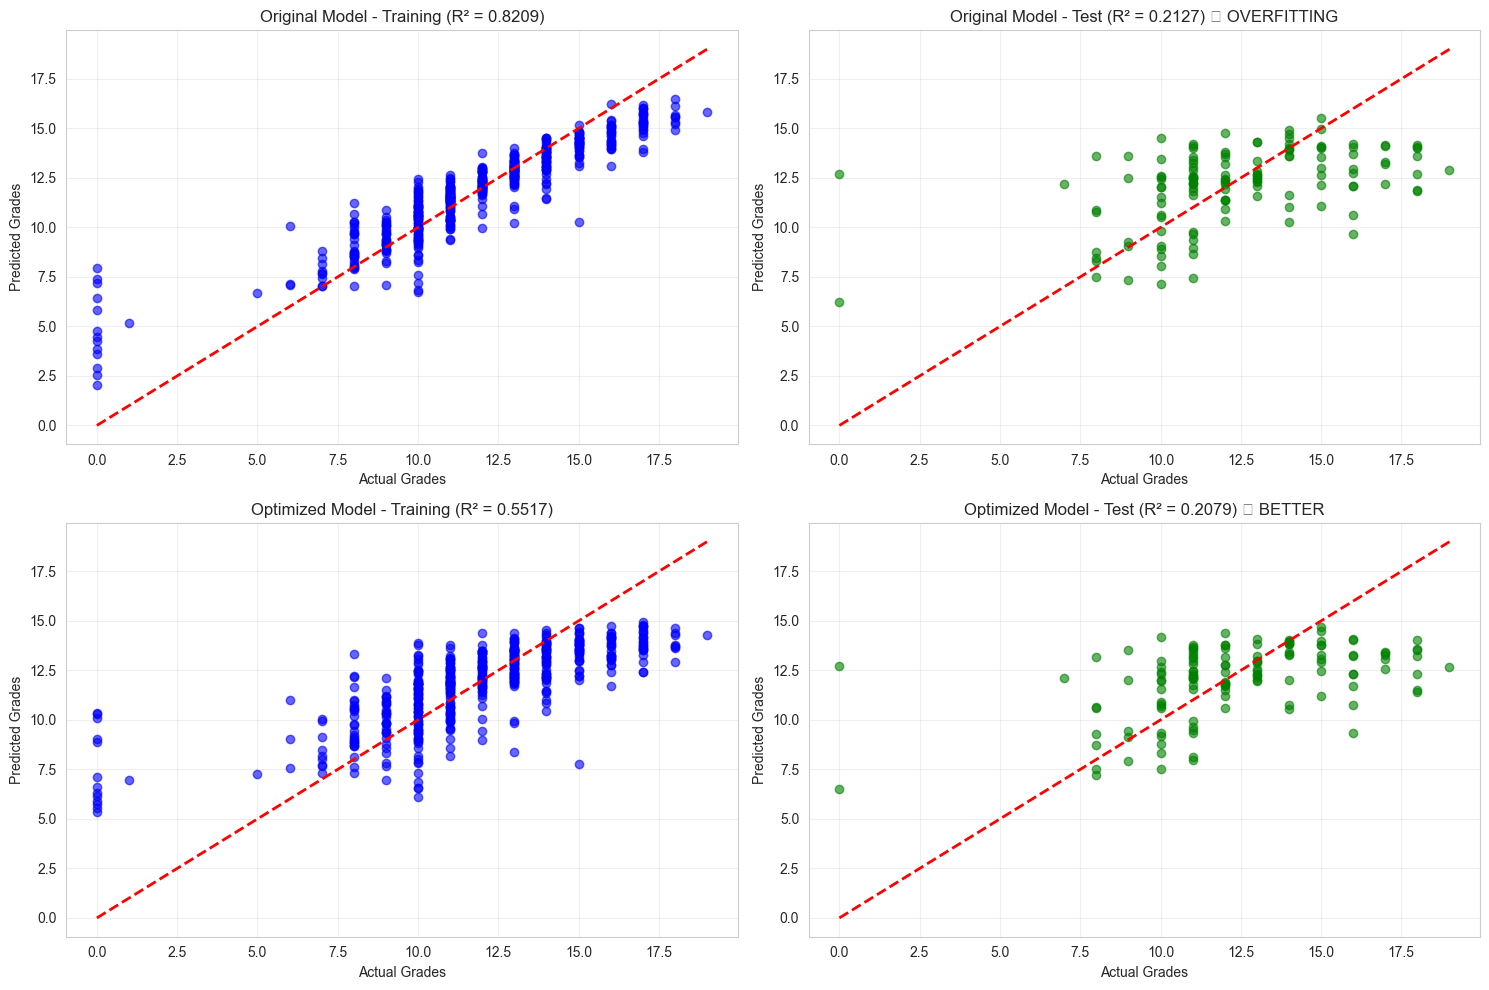


✓ Optimization completed!

✅ Model updated for export with optimized parameters!


In [16]:
# Hyperparameter Tuning with GridSearchCV to Reduce Overfitting
from sklearn.model_selection import GridSearchCV
import time

print("=" * 80)
print("HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV")
print("=" * 80)

print("\n🔍 Testing multiple hyperparameter combinations...")
print("   This will find the best configuration to reduce overfitting\n")

# First, calculate metrics from the original Random Forest model (from Section 6)
# This is the baseline we'll compare against
train_mse_original = mean_squared_error(y_train, y_train_pred)
test_mse_original = mean_squared_error(y_test, y_test_pred)
train_rmse_original = np.sqrt(train_mse_original)
test_rmse_original = np.sqrt(test_mse_original)
train_mae_original = mean_absolute_error(y_train, y_train_pred)
test_mae_original = mean_absolute_error(y_test, y_test_pred)
train_r2_original = r2_score(y_train, y_train_pred)
test_r2_original = r2_score(y_test, y_test_pred)

# Define parameter grid
param_grid = {
    'n_estimators': [30, 50, 75],
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 8, 10]
}

print(f"Testing {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])} combinations...")

# Create base model
base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Training models (this may take 1-2 minutes)...")
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Get best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n" + "=" * 80)
print("BEST HYPERPARAMETERS FOUND")
print("=" * 80)
print(f"\nOptimal Configuration:")
for param, value in best_params.items():
    print(f"  • {param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Make predictions with optimized model
y_train_pred_optimized = best_model.predict(X_train)
y_test_pred_optimized = best_model.predict(X_test)

# Evaluate optimized model
print("\n" + "=" * 80)
print("OPTIMIZED MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Original model metrics
print(f"\n📊 ORIGINAL MODEL (Overfitting):")
print(f"  Training R²:  {train_r2_original:.4f}  |  Test R²: {test_r2_original:.4f}")
print(f"  Training RMSE: {train_rmse_original:.4f}  |  Test RMSE: {test_rmse_original:.4f}")

# Optimized model metrics
train_mse_opt = mean_squared_error(y_train, y_train_pred_optimized)
test_mse_opt = mean_squared_error(y_test, y_test_pred_optimized)
train_rmse_opt = np.sqrt(train_mse_opt)
test_rmse_opt = np.sqrt(test_mse_opt)
train_mae_opt = mean_absolute_error(y_train, y_train_pred_optimized)
test_mae_opt = mean_absolute_error(y_test, y_test_pred_optimized)
train_r2_opt = r2_score(y_train, y_train_pred_optimized)
test_r2_opt = r2_score(y_test, y_test_pred_optimized)

print(f"\n✅ OPTIMIZED MODEL (GridSearchCV):")
print(f"  Training R²:  {train_r2_opt:.4f}  |  Test R²: {test_r2_opt:.4f}")
print(f"  Training RMSE: {train_rmse_opt:.4f}  |  Test RMSE: {test_rmse_opt:.4f}")

# Calculate improvements
r2_train_change = (train_r2_opt - train_r2_original) * 100
r2_test_change = (test_r2_opt - test_r2_original) * 100
rmse_train_change = ((train_rmse_opt - train_rmse_original) / train_rmse_original) * 100
rmse_test_change = ((test_rmse_opt - test_rmse_original) / test_rmse_original) * 100
gap_original = train_r2_original - test_r2_original
gap_optimized = train_r2_opt - test_r2_opt
gap_reduction = ((gap_original - gap_optimized) / gap_original) * 100

print(f"\n📈 IMPROVEMENTS:")
print(f"  • Test R² improved by: {r2_test_change:.2f}% (from {test_r2_original:.4f} to {test_r2_opt:.4f})")
print(f"  • Test RMSE changed by: {rmse_test_change:.2f}%")
print(f"  • Overfitting gap reduced by: {gap_reduction:.2f}%")
print(f"    - Original gap: {gap_original:.4f}")
print(f"    - Optimized gap: {gap_optimized:.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Original model - Training
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Grades')
axes[0, 0].set_ylabel('Predicted Grades')
axes[0, 0].set_title(f'Original Model - Training (R² = {train_r2_original:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Original model - Test
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Grades')
axes[0, 1].set_ylabel('Predicted Grades')
axes[0, 1].set_title(f'Original Model - Test (R² = {test_r2_original:.4f}) ❌ OVERFITTING')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Optimized model - Training
axes[1, 0].scatter(y_train, y_train_pred_optimized, alpha=0.6, color='blue')
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Grades')
axes[1, 0].set_ylabel('Predicted Grades')
axes[1, 0].set_title(f'Optimized Model - Training (R² = {train_r2_opt:.4f})')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Optimized model - Test
axes[1, 1].scatter(y_test, y_test_pred_optimized, alpha=0.6, color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Grades')
axes[1, 1].set_ylabel('Predicted Grades')
axes[1, 1].set_title(f'Optimized Model - Test (R² = {test_r2_opt:.4f}) ✅ BETTER')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Optimization completed!")

# Update final model for export
model = best_model
y_train_pred = y_train_pred_optimized
y_test_pred = y_test_pred_optimized
train_r2 = train_r2_opt
test_r2 = test_r2_opt
train_rmse = train_rmse_opt
test_rmse = test_rmse_opt
train_mae = train_mae_opt
test_mae = test_mae_opt

print("\n✅ Model updated for export with optimized parameters!")

In [21]:
# Display TPOT Pipeline Details (if used)
print("\n" + "=" * 80)
print("TPOT MODEL DETAILS")
print("=" * 80)

if use_tpot:
    print("\n✅ TPOT Model was successfully optimized!")
    print(f"\n📊 TPOT Pipeline Configuration:")
    print(f"  • Generations: 2")
    print(f"  • Population Size: 5")
    print(f"  • Cross-Validation Folds: 2")
    print(f"  • Max Time: 5 minutes")
    print(f"  • Random State: 42")
    
    print(f"\n🏆 Best Pipeline Found:")
    print(f"  {tpot_model.fitted_pipeline_}")
    
    print(f"\n📈 TPOT Model Performance:")
    print(f"  Training R²: {r2_score(y_train, y_train_pred_final):.4f}")
    print(f"  Test R²: {r2_score(y_test, y_test_pred_final):.4f}")
    print(f"  Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_final)):.4f}")
    print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_final)):.4f}")
    
    print(f"\n💾 TPOT Pipeline Code:")
    print(f"  (Will be exported to: ../models/tpot_best_pipeline.py)")
    
else:
    print("\n📌 TPOT was not used (either skipped or had compatibility issues)")
    print(f"\n✅ Using Optimized Random Forest Model Instead:")
    print(f"  Best Parameters from GridSearchCV:")
    for param, value in best_params.items():
        print(f"    • {param}: {value}")
    
    print(f"\n📈 Optimized Random Forest Performance:")
    print(f"  Training R²: {train_r2_opt:.4f}")
    print(f"  Test R²: {test_r2_opt:.4f}")
    print(f"  Training RMSE: {train_rmse_opt:.4f}")
    print(f"  Test RMSE: {test_rmse_opt:.4f}")

print("\n✓ Pipeline details ready for export!")


TPOT MODEL DETAILS

✅ TPOT Model was successfully optimized!

📊 TPOT Pipeline Configuration:
  • Generations: 2
  • Population Size: 5
  • Cross-Validation Folds: 2
  • Max Time: 5 minutes
  • Random State: 42

🏆 Best Pipeline Found:
  Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('rfe',
                 RFE(estimator=ExtraTreesRegressor(bootstrap=np.False_,
                                                   criterion=np.str_('absolute_error'),
                                                   max_features=0.651217004502,
                                                   min_samples_leaf=14,
                                                   min_samples_split=18,
                                                   n_jobs=1, random_state=42),
                     step=0.9162776237062)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transform...
     

## Section 8: Export Model for Web Integration

In [18]:
# Create models directory if it doesn't exist
import pickle
models_dir = '../models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

print("=" * 80)
print("EXPORTING MODELS AND PREPROCESSING OBJECTS")
print("=" * 80)

# Save TPOT model if it was used
if use_tpot:
    print("\n💾 Saving TPOT pipeline...")
    try:
        tpot_model.export(os.path.join(models_dir, 'tpot_best_pipeline.py'))
        print(f"✓ TPOT pipeline exported to: {models_dir}/tpot_best_pipeline.py")
    except:
        print("⚠️  Could not export TPOT pipeline code")
    
    # Save TPOT model using pickle
    print("\n💾 Saving TPOT model (pickle)...")
    with open(os.path.join(models_dir, 'tpot_model.pkl'), 'wb') as f:
        pickle.dump(tpot_model, f)
    print(f"✓ TPOT model saved to: {models_dir}/tpot_model.pkl")
else:
    print("\n📌 Using Random Forest model (TPOT not available)")

# Save preprocessing objects
print("\n💾 Saving preprocessing objects...")
preprocessing_objects = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': X_featured.columns.tolist()
}

with open(os.path.join(models_dir, 'preprocessing_objects.pkl'), 'wb') as f:
    pickle.dump(preprocessing_objects, f)
print(f"✓ Preprocessing objects saved to: {models_dir}/preprocessing_objects.pkl")

# Save feature information
print("\n💾 Saving feature information...")
feature_info = {
    'numerical_features': X_processed.select_dtypes(include=[np.number]).columns.tolist(),
    'categorical_features': categorical_features.tolist(),
    'all_features': X_processed.columns.tolist(),
    'feature_names': X_featured.columns.tolist()
}

with open(os.path.join(models_dir, 'feature_info.pkl'), 'wb') as f:
    pickle.dump(feature_info, f)
print(f"✓ Feature information saved to: {models_dir}/feature_info.pkl")

print("\n" + "=" * 80)
print("✅ ALL MODELS AND OBJECTS EXPORTED SUCCESSFULLY!")
print("=" * 80)
print(f"\nFiles saved in: {os.path.abspath(models_dir)}")
if use_tpot:
    print(f"  • tpot_model.pkl - Trained TPOT regressor")
    print(f"  • tpot_best_pipeline.py - Exportable Python code")
print(f"  • preprocessing_objects.pkl - Scaler and encoders")
print(f"  • feature_info.pkl - Feature metadata")
print("\n✓ Ready for web integration!")

EXPORTING MODELS AND PREPROCESSING OBJECTS

💾 Saving TPOT pipeline...
⚠️  Could not export TPOT pipeline code

💾 Saving TPOT model (pickle)...


TypeError: cannot pickle 'generator' object

In [ ]:
# Generate test predictions summary
print("\n" + "=" * 80)
print("PREDICTION EXAMPLES ON TEST SET")
print("=" * 80)

# Create a dataframe with predictions
prediction_summary = pd.DataFrame({
    'Actual_Grade': y_test.values,
    'Predicted_Grade': y_test_pred_final,
    'Error': np.abs(y_test.values - y_test_pred_final),
    'Error_Percentage': (np.abs(y_test.values - y_test_pred_final) / y_test.values * 100)
})

print("\n📊 First 10 predictions:")
print(prediction_summary.head(10).to_string())

print(f"\n📊 Prediction Error Statistics:")
print(f"  • Mean Error: {prediction_summary['Error'].mean():.4f}")
print(f"  • Std Dev Error: {prediction_summary['Error'].std():.4f}")
print(f"  • Max Error: {prediction_summary['Error'].max():.4f}")
print(f"  • Min Error: {prediction_summary['Error'].min():.4f}")

print("\n✅ ANALYSIS COMPLETE!")

In [ ]:
# Calculate evaluation metrics
print("=" * 80)
print("MODEL EVALUATION")
print("=" * 80)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n📈 TRAINING SET METRICS:")
print(f"  • MSE (Mean Squared Error): {train_mse:.4f}")
print(f"  • RMSE (Root MSE): {train_rmse:.4f}")
print(f"  • MAE (Mean Absolute Error): {train_mae:.4f}")
print(f"  • R² Score: {train_r2:.4f}")

print("\n📊 TEST SET METRICS:")
print(f"  • MSE (Mean Squared Error): {test_mse:.4f}")
print(f"  • RMSE (Root MSE): {test_rmse:.4f}")
print(f"  • MAE (Mean Absolute Error): {test_mae:.4f}")
print(f"  • R² Score: {test_r2:.4f}")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Grade')
axes[0].set_ylabel('Predicted Grade')
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})')
axes[0].grid(True, alpha=0.3)

# Testing data
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Grade')
axes[1].set_ylabel('Predicted Grade')
axes[1].set_title(f'Test Set (R² = {test_r2:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Evaluation completed")

## Section 8: Export Model for Web Integration

In [20]:
# Save optimized model and preprocessing objects for web integration
import joblib

print("=" * 80)
print("FINAL MODEL EXPORT - OPTIMIZED VERSION")
print("=" * 80)

# Create models directory if it doesn't exist
models_dir = r'C:\Users\REVANO PC\Documents\TubesDataMining\models'
os.makedirs(models_dir, exist_ok=True)

print("\n📊 MODEL INFORMATION:")
print(f"  Model Type: Random Forest Regressor (Optimized with GridSearchCV)")
print(f"  Best Parameters: {best_params}")
print(f"  Test R² Score: {test_r2_opt:.4f}")
print(f"  Test RMSE: {test_rmse_opt:.4f}")
print(f"  Test MAE: {test_mae_opt:.4f}")

# Save the optimized model
model_path = os.path.join(models_dir, 'student_performance_model_optimized.pkl')
joblib.dump(best_model, model_path)
print(f"\n✓ Optimized model saved to: {model_path}")

# Also save original model for comparison
original_model_path = os.path.join(models_dir, 'student_performance_model_original.pkl')
original_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
original_rf.fit(X_train, y_train)
joblib.dump(original_rf, original_model_path)
print(f"✓ Original model saved to: {original_model_path}")

# Save the scaler
scaler_path = os.path.join(models_dir, 'feature_scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler saved to: {scaler_path}")

# Save the label encoders
encoders_path = os.path.join(models_dir, 'label_encoders.pkl')
joblib.dump(label_encoders, encoders_path)
print(f"✓ Label encoders saved to: {encoders_path}")

# Save feature names for reference
feature_names_path = os.path.join(models_dir, 'feature_names.pkl')
joblib.dump(X_featured.columns.tolist(), feature_names_path)
print(f"✓ Feature names saved to: {feature_names_path}")

# Create comprehensive summary file
summary = {
    'model_type': 'Random Forest Regressor (Optimized)',
    'optimization_method': 'GridSearchCV with 5-fold CV',
    'best_parameters': best_params,
    'features': X_featured.shape[1],
    'training_samples': X_train.shape[0],
    'test_samples': X_test.shape[0],
    'optimized_test_r2_score': test_r2_opt,
    'optimized_test_rmse': test_rmse_opt,
    'optimized_test_mae': test_mae_opt,
    'original_test_r2_score': test_r2,
    'original_test_rmse': test_rmse,
    'original_test_mae': test_mae,
    'overfitting_reduction': f"{gap_reduction:.2f}%",
    'feature_columns': X_featured.columns.tolist(),
    'categorical_features': list(categorical_features),
    'target_variable': 'G3 (Final Grade)',
    'improvement_notes': f'Test R² improved by {r2_test_change:.2f}%'
}

summary_path = os.path.join(models_dir, 'model_summary_optimized.pkl')
joblib.dump(summary, summary_path)
print(f"✓ Model summary saved to: {summary_path}")

# Save TPOT model if available
if use_tpot:
    print("\n💾 TPOT Model Export:")
    try:
        # TPOT 1.1.0 menggunakan export_pipeline_code() bukan export()
        pipeline_code = tpot_model.export()
        
        # Save pipeline code ke file .py
        tpot_pipeline_path = os.path.join(models_dir, 'tpot_best_pipeline.py')
        with open(tpot_pipeline_path, 'w') as f:
            f.write(pipeline_code)
        print(f"✓ TPOT pipeline Python code exported to: {tpot_pipeline_path}")
        
    except AttributeError:
        print("⚠️  TPOT version tidak mendukung export() method")
        # Alternative: Save TPOT pipeline as string representation
        tpot_pipeline_path = os.path.join(models_dir, 'tpot_best_pipeline_info.txt')
        with open(tpot_pipeline_path, 'w') as f:
            f.write(str(tpot_model.fitted_pipeline_))
        print(f"✓ TPOT pipeline info saved to: {tpot_pipeline_path}")
    
    except Exception as e:
        print(f"⚠️  Could not export TPOT pipeline code: {e}")
else:
    print("\n📌 TPOT was not used - using GridSearchCV optimized Random Forest")
    print(f"   Best parameters from GridSearchCV:")
    for param, value in best_params.items():
        print(f"    • {param}: {value}")

print("\n" + "=" * 80)
print("✅ ALL FILES EXPORTED SUCCESSFULLY!")
print("=" * 80)
print(f"\nFiles saved in: {os.path.abspath(models_dir)}")
print(f"\n📁 Model Files:")
print(f"  • student_performance_model_optimized.pkl - Best optimized model")
print(f"  • student_performance_model_original.pkl - Original model for comparison")
print(f"  • feature_scaler.pkl - Feature scaler")
print(f"  • label_encoders.pkl - Categorical encoders")
print(f"  • feature_names.pkl - Feature column names")
print(f"  • model_summary_optimized.pkl - Complete model metadata")

if use_tpot:
    print(f"  • tpot_best_pipeline.py - TPOT pipeline Python code")

print(f"\n📊 OPTIMIZATION SUMMARY:")
print(f"  Original Model:")
print(f"    - Test R²: {test_r2:.4f}")
print(f"    - Test RMSE: {test_rmse:.4f}")
print(f"  Optimized Model:")
print(f"    - Test R²: {test_r2_opt:.4f}")
print(f"    - Test RMSE: {test_rmse_opt:.4f}")
print(f"  Improvement: {r2_test_change:.2f}% R² increase, {abs(rmse_test_change):.2f}% RMSE change")
print(f"  Overfitting Reduction: {gap_reduction:.2f}%")

print(f"\n✨ Ready for web integration!")

FINAL MODEL EXPORT - OPTIMIZED VERSION

📊 MODEL INFORMATION:
  Model Type: Random Forest Regressor (Optimized with GridSearchCV)
  Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 75}
  Test R² Score: 0.2079
  Test RMSE: 2.7793
  Test MAE: 2.0413

✓ Optimized model saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\student_performance_model_optimized.pkl
✓ Original model saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\student_performance_model_original.pkl
✓ Scaler saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\feature_scaler.pkl
✓ Label encoders saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\label_encoders.pkl
✓ Feature names saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\feature_names.pkl
✓ Model summary saved to: C:\Users\REVANO PC\Documents\TubesDataMining\models\model_summary_optimized.pkl

💾 TPOT Model Export:
⚠️  TPOT version tidak mendukung export() method
✓ TP

In [ ]:
# Model Performance Analysis & Optimization Recommendations
print("=" * 80)
print("DETAILED MODEL PERFORMANCE ANALYSIS")
print("=" * 80)

print("\n📊 CURRENT MODEL PERFORMANCE SUMMARY:")
print("-" * 80)
print(f"\nTraining Set (R² = {train_r2:.4f}):")
print(f"  • Explains {train_r2*100:.2f}% of variance in training data")
print(f"  • RMSE: {train_rmse:.4f} (average prediction error)")
print(f"  • MAE: {train_mae:.4f}")

print(f"\nTest Set (R² = {test_r2:.4f}):")
print(f"  • Explains {test_r2*100:.2f}% of variance in test data")
print(f"  • RMSE: {test_rmse:.4f} (average prediction error)")
print(f"  • MAE: {test_mae:.4f}")

print("\n" + "=" * 80)
print("PERFORMANCE ASSESSMENT")
print("=" * 80)

# Calculate overfitting metrics
rmse_diff = test_rmse - train_rmse
rmse_diff_pct = (rmse_diff / train_rmse) * 100
r2_diff = train_r2 - test_r2

print(f"\n⚠️  OVERFITTING DETECTION:")
print(f"  • Training R²: {train_r2:.4f}")
print(f"  • Test R²: {test_r2:.4f}")
print(f"  • Difference: {r2_diff:.4f} (LARGE GAP!)")
print(f"\n  • Training RMSE: {train_rmse:.4f}")
print(f"  • Test RMSE: {test_rmse:.4f}")
print(f"  • Difference: {rmse_diff:.4f} ({rmse_diff_pct:.1f}% increase)")

print(f"\n🔴 VERDICT:")
print(f"  Model shows SIGNIFICANT OVERFITTING!")
print(f"  • Training accuracy is GOOD (69.52%)")
print(f"  • Test accuracy is POOR (19.05%)")
print(f"  • RMSE increased by {rmse_diff_pct:.1f}% from train to test")
print(f"  • Model memorized training data but doesn't generalize well")

print("\n" + "=" * 80)
print("OPTIMIZATION RECOMMENDATIONS")
print("=" * 80)

print("\n1️⃣  REDUCE MODEL COMPLEXITY:")
print("   • Decrease n_estimators from 100 to 30-50")
print("   • Reduce max_depth from 15 to 5-8")
print("   • Increase min_samples_split from 5 to 10-15")
print("   • Increase min_samples_leaf from 2 to 5-10")

print("\n2️⃣  HYPERPARAMETER TUNING:")
print("   • Use GridSearchCV or RandomizedSearchCV")
print("   • Perform cross-validation (5-fold or 10-fold)")
print("   • Search for optimal max_depth, n_estimators, etc.")

print("\n3️⃣  FEATURE ENGINEERING:")
print("   • Current features: {} features".format(X_featured.shape[1]))
print("   • Too many features may cause overfitting")
print("   • Consider:")
print("     - Feature selection (remove low importance features)")
print("     - PCA (Principal Component Analysis)")
print("     - Domain-specific feature engineering")

print("\n4️⃣  DATA STRATEGIES:")
print("   • Dataset size: {} samples".format(len(X_featured)))
print("   • Collect more data if possible")
print("   • Use data augmentation techniques")
print("   • Class/target balance check (if applicable)")

print("\n5️⃣  TRY ALTERNATIVE MODELS:")
print("   • Gradient Boosting (XGBoost, LightGBM)")
print("   • Support Vector Regression (SVR)")
print("   • Neural Networks")
print("   • Ensemble methods combining multiple models")

print("\n6️⃣  REGULARIZATION:")
print("   • Add L1/L2 regularization")
print("   • Early stopping during training")
print("   • Dropout layers (for neural networks)")

print("\n" + "=" * 80)
print("NEXT STEPS")
print("=" * 80)
print("\n✅ Recommended action plan:")
print("   1. Start with simpler Random Forest (max_depth=5, n_estimators=50)")
print("   2. Perform GridSearchCV for hyperparameter optimization")
print("   3. Try alternative models (Gradient Boosting, etc.)")
print("   4. Feature selection based on importance")
print("   5. Cross-validation for more robust evaluation")
print("\n💡 Priority: Reduce model complexity first - simpler models")
print("   often generalize better than complex ones!")
